In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime,date
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
today = date.today()
start = datetime(2018, 1, 1)
end = datetime(today.year, today.month, today.day)
# end = datetime(2018, 11, 24)
print(start, end)

2018-01-01 00:00:00 2018-11-27 00:00:00


In [4]:
with open('alltickers.csv') as file:
	data = [i.split(',') for i in file.readlines()]
len(data)

2230

In [7]:
for i in data:
    if len(i) != 10:
        print(i)

In [11]:
str(date.today())

'2018-11-27'

In [15]:
date(2018-11-27)

TypeError: Required argument 'month' (pos 2) not found

In [24]:
for i in data:
    i[2] = i[2].zfill(6)+'.KS'
len(data)

2230

In [25]:
print(data[:10])

[['0', 'CJ', '001040.KS', '기타 금융업', '지주회사', '1973-06-29', '12월', '손경식/ 이재현/ 이채욱', 'http://www.cj.net', '서울특별시\n'], ['1', 'CJ씨푸드', '011150.KS', '기타 식품 제조업', '수산물(어묵/맛살)가공품 도매/원양수산업/수출입', '1988-11-26', '12월', '박정훈/ 이인덕(각자대표)', 'http://www.cjseafood.net', '경기도\n'], ['2', 'HDC', '012630.KS', '건물 건설업', '토목공사/건축공사/아파트분양사업/재개발/재건축사업', '1996-10-16', '12월', '정몽규', 'http://www.i-park.com', '서울특별시\n'], ['3', 'HSD엔진', '082740.KS', '일반 목적용 기계 제조업', '대형선박용엔진/내연발전엔진', '2011-01-04', '12월', '고영열', 'http://www.doosanengine.com', '경상남도\n'], ['4', 'KG케미칼', '001390.KS', '기초 화학물질 제조업', '콘크리트혼화제/ 비료/ 친환경농자재/ 수처리제', '1989-08-25', '12월', '김경묵', 'http://www.kgchem.co.kr', '울산광역시\n'], ['5', 'OCI', '010060.KS', '기초 화학물질 제조업', '타르제품/카본블랙/무수프탈산/농약원제/석탄화학제품/정밀화학제품/플라스틱창호재 제조/판매', '1985-07-09', '12월', '백우석/ 이우현 (2인/ 각자 대표이사)', 'http://www.oci.co.kr', '서울특별시\n'], ['6', 'SH에너지화학', '002360.KS', '기초 화학물질 제조업', '합성수지(PS/EPS/ABS수지) 제조', '1985-12-23', '12월', '이규봉/노상섭', 'http://www.sh-enerchem.com', '전라북도\n'], ['7', 'SK네트웍스'

In [54]:
import csv

with open("alltickers2.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(data)

In [26]:
today = date.today()
start = datetime(2018, 1, 1)
end = datetime(today.year, today.month, today.day)

In [32]:
for i in data[50:100]:
    if i[2] == '051500.KS':
        print(i)

['97', 'CJ프레시웨이', '051500.KS', '음·식료품 및 담배 도매업', '식자재유통/ 단체급식', '2001-07-26', '12월', '문종석', 'http://www.cjfreshway.com', '경기도\n']


In [34]:
for i in data[96:100]:
    print(i)

['96', '호텔신라', '008770.KS', '기타 상품 전문 소매업', '면세판매/관광숙박/외식사업/예식업', '1991-03-12', '12월', '이부진', 'http://www.hotelshilla.net', '서울특별시\n']
['97', 'CJ프레시웨이', '051500.KS', '음·식료품 및 담배 도매업', '식자재유통/ 단체급식', '2001-07-26', '12월', '문종석', 'http://www.cjfreshway.com', '경기도\n']
['98', 'EG', '037370.KS', '기타 전문 도매업', '산화철/ 대기수처리방지시설/ 무역', '2000-01-11', '12월', '문경환', 'http://www.egcorp.co.kr', '충청남도\n']
['99', 'GH신소재', '130500.KS', '기타 섬유제품 제조업', '자동차용 부직포/ 폴리우레탄 폼', '2013-08-02', '12월', '우희구', 'http://www.gumho-nt.com', '경상북도\n']


In [40]:
# except loop - test
for i in data[96:100]:
    try:
        history = web.DataReader(i[2],'yahoo',start, end)
        history.to_pickle(i[2])
        print(i[0],i[1],i[2],'success')
    except KeyError :
        print(i[0],i[1],i[2],'failed')
        break

96 호텔신라 008770.KS success


RemoteDataError: No data fetched for symbol 051500.KS using YahooDailyReader

In [33]:
history = web.DataReader('051500.KS','yahoo',start, end)
history.to_pickle(i[2])

RemoteDataError: No data fetched for symbol 051500.KS using YahooDailyReader

In [31]:
# crawling loop !!! 
for i in data[50:100]:
    history = web.DataReader(i[2],'yahoo',start, end)
    history.to_pickle(i[2])

RemoteDataError: No data fetched for symbol 051500.KS using YahooDailyReader

In [23]:
# crawling loop !!! 
for i in data[:3]:
    history = web.DataReader(i[2],'yahoo',start, end)
    history.to_pickle(i[2])
#     history.tail()
#     history['Close'].plot(figsize=(12,6), grid=True)

RemoteDataError: No data fetched for symbol 1040 using YahooDailyReader

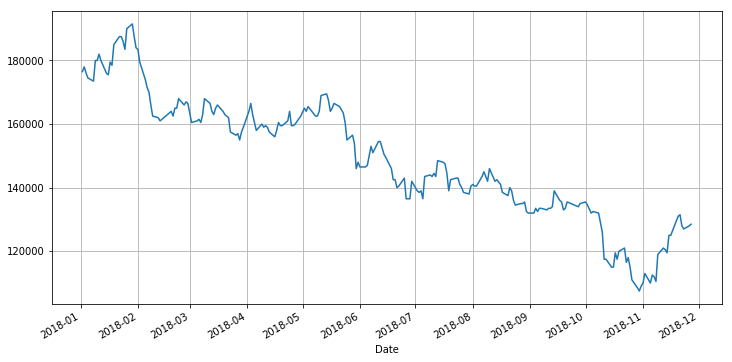

In [82]:
# graph
history = pd.read_pickle('001040.KS')
history['Close'].plot(figsize=(12,6), grid=True, label='Close')


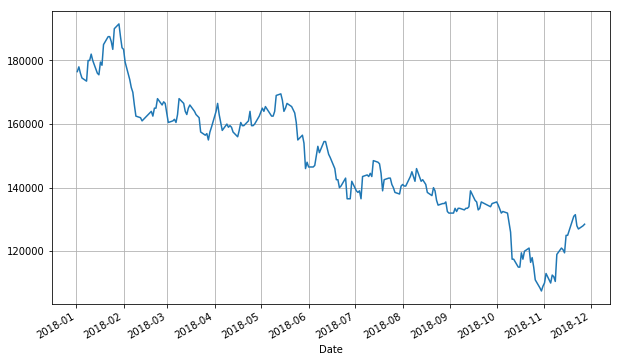

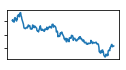

In [113]:
# graph
history = pd.read_pickle('001040.KS')
fig = plt.figure()
history['Close'].plot(figsize=(10,6), grid=True, label='Close')
fig.savefig('output.png')
fig = plt.figure()
ax1 = plt.axes()
ax1.xaxis.set_visible(False)
ax1.set_yticklabels([])
history['Close'].plot(figsize=(2,1), grid=False, label='Close')
fig.savefig('output-min.png')

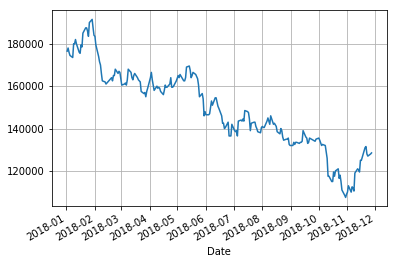

In [94]:
# graph
history = pd.read_pickle('001040.KS')
fig = plt.figure()
history['Close'].plot(grid=True, label='Close')
fig.savefig('output-min.png')

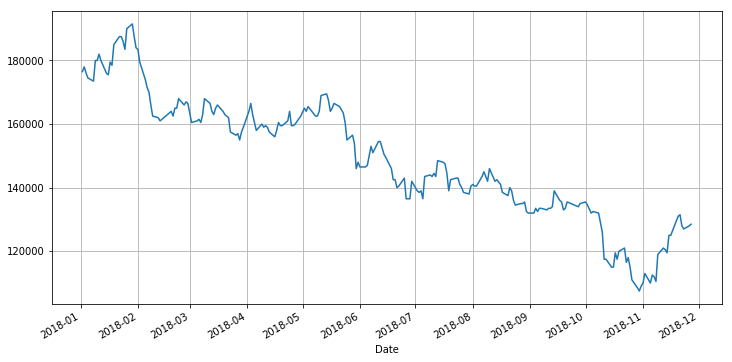

In [88]:
# file read loop
%matplotlib inline
for i in data[:1]:
    history = pd.read_pickle(i[2])
#     history.plot(figsize=(12,6), grid=True, title = i[1])
    fig = history['Close'].plot(figsize=(12,6), grid=True, label='Close')
#     history['High'].plot(figsize=(12,6), label='High')
#     history['Low'].plot(figsize=(12,6), label='Low')
    

In [ ]:
SB = web.DataReader('207940.KS','yahoo',start, end)
SB

In [6]:
SB.to_pickle('test_to_dict')

In [ ]:
SB.sort_index(inplace=True, ascending=False)
SB

In [19]:
SB.dtypes

High         int64
Low          int64
Open         int64
Close        int64
Volume       int64
Adj Close    int64
dtype: object

In [9]:
SB2 = web.DataReader('005930.KS','yahoo',start,end)
SB2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,25200.0,24100.0,25200.0,24100.0,15346950.0,1168.414795
2016-01-05,24360.0,23720.0,24040.0,24160.0,10800100.0,1171.323486
2016-01-06,24160.0,23360.0,24160.0,23500.0,18337600.0,1139.325317
2016-01-07,23660.0,23020.0,23320.0,23260.0,14119400.0,1127.689697
2016-01-08,23720.0,23260.0,23260.0,23420.0,12888150.0,1135.446655


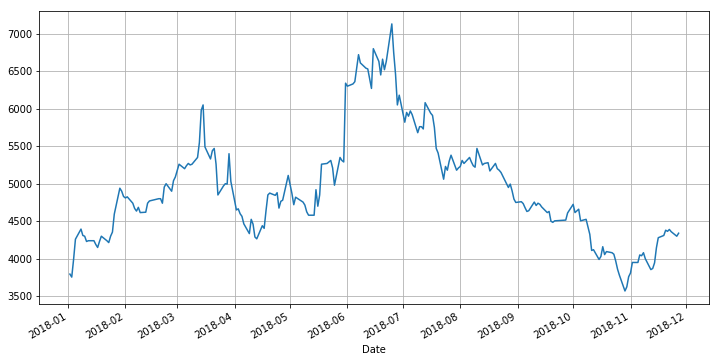

In [4]:
%matplotlib inline
SB['Close'].plot(figsize=(12,6), grid=True)

In [10]:
df = pd.DataFrame({'ds':SB.index, 'y':SB['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2016-11-10,144000
1,2016-11-11,161500
2,2016-11-14,175500
3,2016-11-15,166000
4,2016-11-16,170000


In [14]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(df);

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
852,2019-11-12
853,2019-11-13
854,2019-11-14
855,2019-11-15
856,2019-11-16


In [16]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
852,2019-11-12,209986.416292,88954.491097,326358.176797
853,2019-11-13,208921.437495,83512.798066,330333.567886
854,2019-11-14,207675.519117,84325.140966,330668.032301
855,2019-11-15,208576.663200,86941.259268,329665.501645
856,2019-11-16,205379.790809,72735.859083,331136.323191


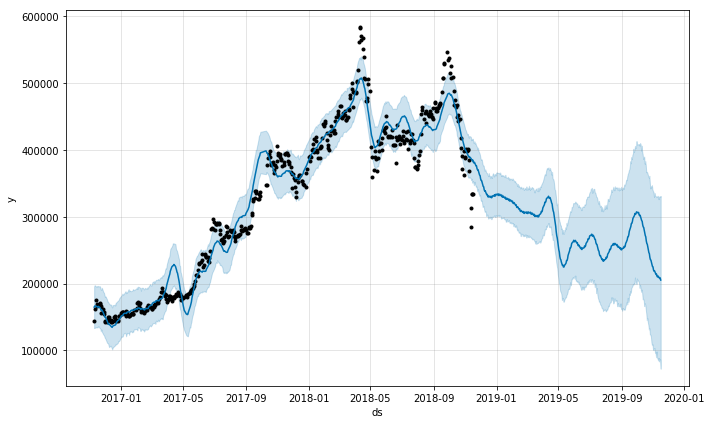

In [17]:
m.plot(forecast);

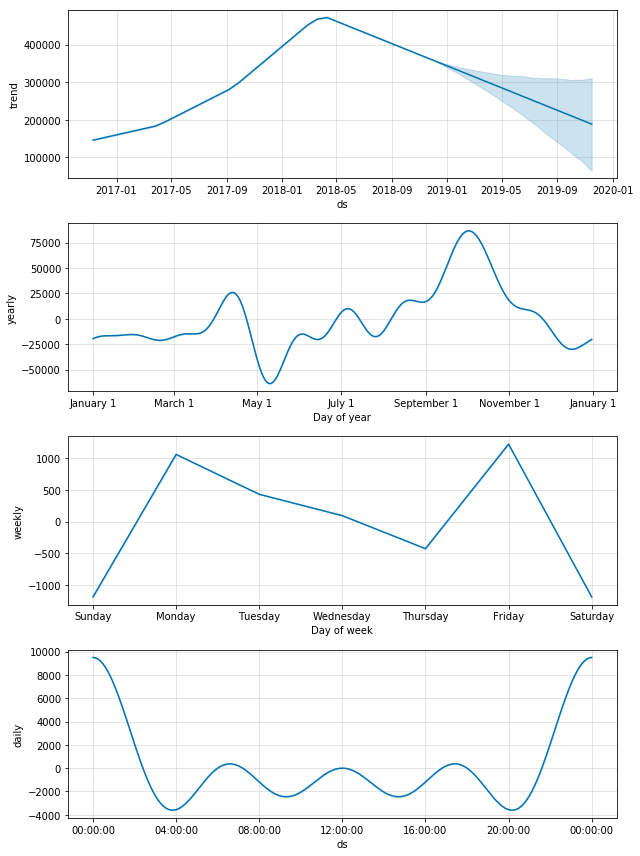

In [18]:
m.plot_components(forecast);

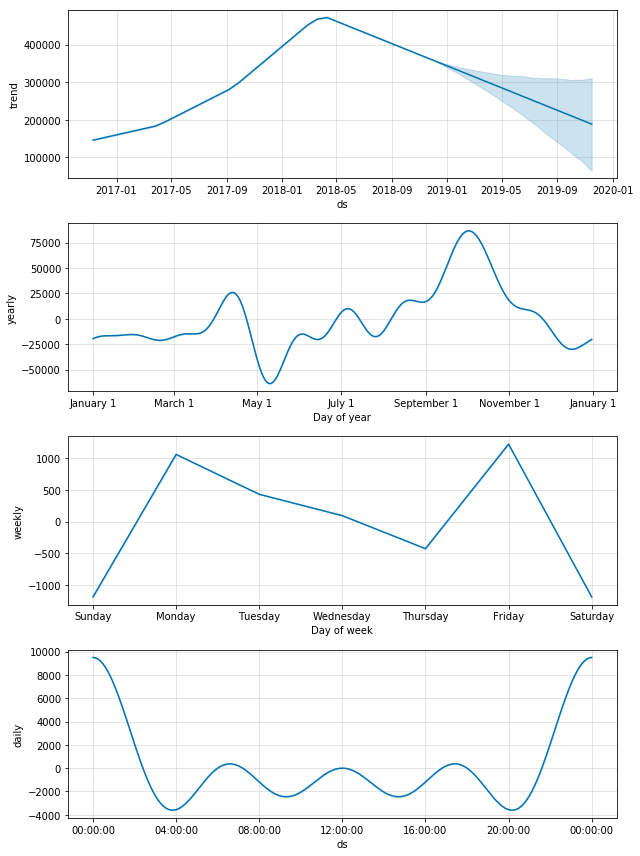

In [19]:
m.plot_components(forecast).savefig('test.png');